In [2]:
from xgboost import XGBClassifier
import pandas as pd 
import wandb
from gpt3forchem.polymers.featurizer  import featurize_many
from gpt3forchem.polymers.data import get_data
from gpt3forchem.polymers.constants import TARGETS, FEATURES, CAT_TARGETS
from gpt3forchem.mofs.baseline.classification import XGBClassificationBaseline
from gpt3forchem.mofs.baseline.regression import XGBRegressionBaseline
from pycm import *
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use(['science', 'nature'])
import joblib

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = get_data()

In [4]:
TARGETS

['deltaGmin', 'A2_normalized']

In [5]:
CAT_TARGETS

['deltaGmin_cat', 'A2_normalized_cat']

In [6]:
X = df[FEATURES]
#y = df[CAT_TARGETS[0]].replace({"very small": 0, "small": 1, "medium": 2, "large": 3, "very large": 4})
y = df[TARGETS[0]]

In [7]:
model = XGBRegressionBaseline(524524)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [9]:
run = wandb.init(
    project="gpt-3",
    job_type="delta-g-predicttor",
    config={
        "train_size": len(X_train),
        "test_size": len(X_test),
        "features": FEATURES,
        "targets": [TARGETS[0]],
        "ds": "polymer",
    },
)


wandb: Currently logged in as: kjappelbaum. Use `wandb login --relogin` to force relogin


In [10]:
from IPython.utils import io

with io.capture_output() as captured:
    model.tune(X_train, y_train);

[I 2022-07-01 14:19:09,261] A new study created in memory with name: no-name-b98dca1e-af29-41ae-963f-83087ff49f0a
[I 2022-07-01 14:19:43,744] Trial 0 finished with value: 0.37563971009039127 and parameters: {'max_depth': 4, 'learning_rate': 0.027215111861196635, 'colsample_bytree': 0.25016390343446626, 'subsample': 0.6967136405126441, 'alpha': 1.2367036045195612, 'lambda': 0.00011112374444674256, 'min_child_weight': 22.050631472702428}. Best is trial 0 with value: 0.37563971009039127.
[I 2022-07-01 14:20:12,262] Trial 1 finished with value: 1.1788650824752887 and parameters: {'max_depth': 9, 'learning_rate': 0.02879218825325805, 'colsample_bytree': 0.20997743923194157, 'subsample': 0.7383762301401272, 'alpha': 0.05460070288563517, 'lambda': 0.0007217818854156072, 'min_child_weight': 439.4183175264513}. Best is trial 0 with value: 0.37563971009039127.
[I 2022-07-01 14:20:28,143] Trial 2 finished with value: 1.2881615437671663 and parameters: {'max_depth': 5, 'learning_rate': 0.022564232

In [11]:
model.fit(X_train.values, y_train)

In [12]:
test_predictions = model.predict(X_test)

In [13]:
cm = ConfusionMatrix(y_test.values, test_predictions)

In [14]:
print(cm)

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.8/site-packages/pycm/pycm_obj.py:206: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)
IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



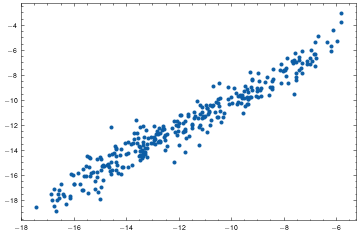

In [16]:
plt.scatter(test_predictions, y_test)

In [1]:
import joblib

In [7]:
model = joblib.load("delta_g_model.joblib")

In [8]:
model.fit(X.values, y)

In [9]:
joblib.dump(model, 'delta_g_model.joblib')

['delta_g_model.joblib']